<a href="https://colab.research.google.com/github/hariharan-075/ML/blob/main/2420080075_week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



Accuracy (Gini): 1.0
Accuracy (Entropy): 0.9777777777777777


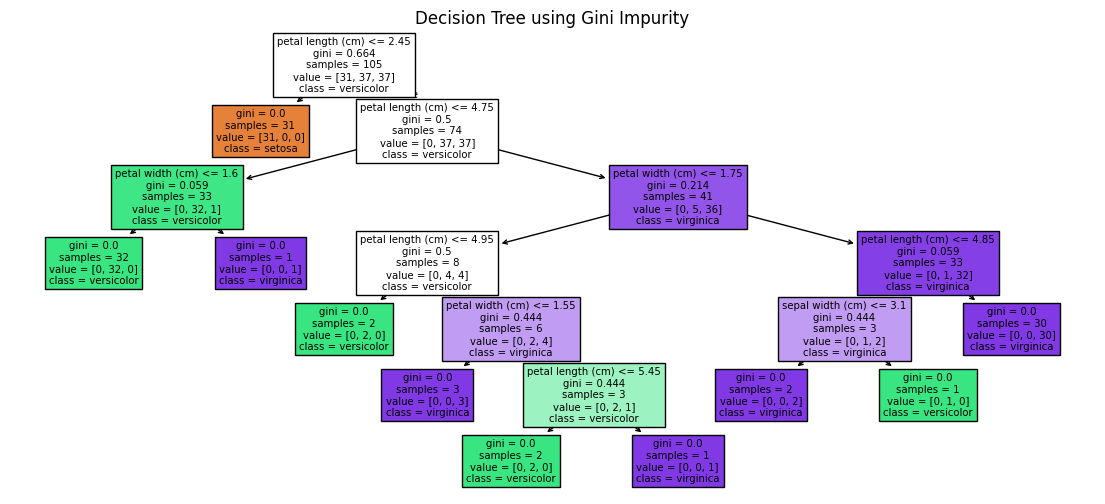

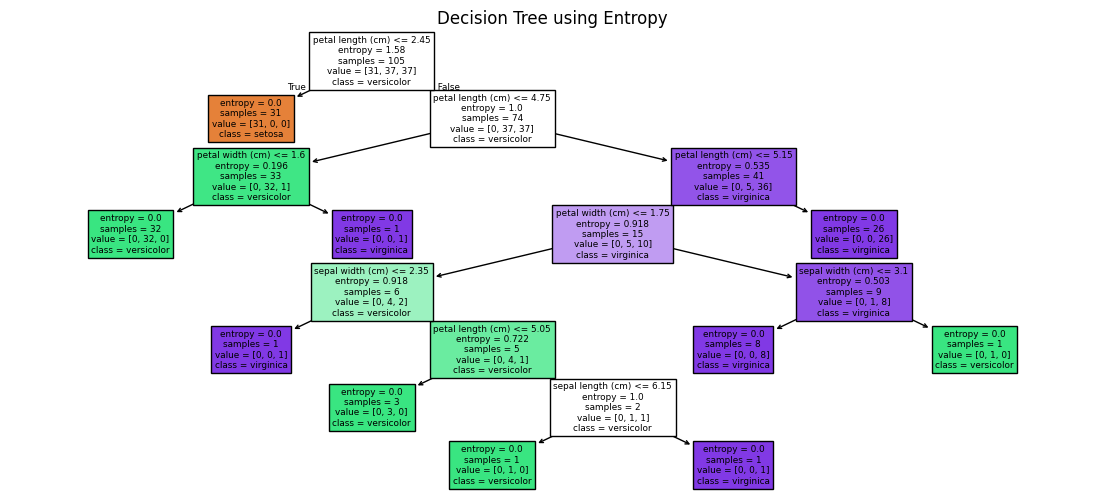

Feature Importance (Gini): [0.         0.01911002 0.89326355 0.08762643]
Feature Importance (Entropy): [0.01205428 0.03875126 0.88771555 0.06147891]


In [ ]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Decision Tree with Gini
dt_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
dt_gini.fit(X_train, y_train)

# Decision Tree with Entropy
dt_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt_entropy.fit(X_train, y_train)

# Predictions
y_pred_gini = dt_gini.predict(X_test)
y_pred_entropy = dt_entropy.predict(X_test)

# Accuracy
print("Accuracy (Gini):", accuracy_score(y_test, y_pred_gini))
print("Accuracy (Entropy):", accuracy_score(y_test, y_pred_entropy))

# Visualization
plt.figure(figsize=(14,6))
plot_tree(dt_gini, feature_names=iris.feature_names,
          class_names=iris.target_names, filled=True)
plt.title("Decision Tree using Gini Impurity")
plt.show()

plt.figure(figsize=(14,6))
plot_tree(dt_entropy, feature_names=iris.feature_names,
          class_names=iris.target_names, filled=True)
plt.title("Decision Tree using Entropy")
plt.show()

# Feature Importance
print("Feature Importance (Gini):", dt_gini.feature_importances_)
print("Feature Importance (Entropy):", dt_entropy.feature_importances_)


In [ ]:
path = dt_gini.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas


In [ ]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(max_depth=3)
reg.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=3)

In [ ]:
from sklearn.tree import export_text
rules = export_text(dt_gini, feature_names=iris.feature_names)
print(rules)


|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.60
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.60
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |   |--- class: 1
|   |   |   |--- petal 